In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# для выведения всех столбцов с признаками
pd.set_option('display.max_columns', None) 

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
df.head()

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,gear-type,luxury,max-speed,power-electro-kw,supply-system,valves,valvetrain,weight,configurations_auto-premiere,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,2018,2,1,36646,-1.0,-1.0,0,2,0,820.0,36479,1300.0,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,1993,2,2,44289,217.0,-1.0,0,1354,0,2350.0,44895,1555.0,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,2018,0,1,55481,193.0,-1.0,0,2,0,1350.0,55963,1534.0,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,2003,2,1,40914,189.0,-1.0,1,0,1,1090.0,41425,1495.0,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,2005,0,1,22118,185.0,-1.0,3,0,1,1410.0,22491,1515.0,4,1,13,62.0,2005.0,10,3,0,1,2703


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

In [ ]:
df.corr() # матрица корреляции

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,gear-type,luxury,max-speed,power-electro-kw,supply-system,valves,valvetrain,weight,configurations_auto-premiere,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
index,1.000000,0.003898,-0.001457,-0.005556,-0.000464,-0.000202,-0.002258,-0.001537,0.001591,-0.000337,0.000014,-0.001997,-0.001389,-0.002904,0.002346,0.007510,-0.007180,0.006258,0.002195,-0.001538,-0.005759,0.004761,0.004611,-0.004249,0.000466,-0.001526,0.000074,-0.006934,0.006834,0.005661,-0.001654,0.002701
back-suspension,0.003898,1.000000,0.008851,-0.193989,-0.105450,-0.137078,-0.119261,-0.160858,0.061687,-0.029760,-0.026592,0.023575,0.004268,-0.188800,-0.109077,-0.003078,-0.033765,0.132197,0.027428,-0.266417,-0.194854,-0.130673,-0.102584,-0.031057,-0.042323,-0.323143,-0.021228,-0.116755,-0.019685,-0.016126,0.043355,-0.159912
battery-capacity,-0.001457,0.008851,1.000000,-0.031922,-0.057803,-0.043129,0.158632,-0.145231,0.065207,0.056365,-0.103095,-0.013112,-0.022934,-0.002355,0.029325,0.410707,-0.021193,0.124941,0.043971,0.007378,-0.003152,-0.030135,0.022147,-0.008994,0.006409,-0.071311,-0.102719,0.020826,0.002595,-0.001942,0.024069,0.025703
charge-time,-0.005556,-0.193989,-0.031922,1.000000,0.018219,0.046768,0.107905,0.121424,-0.007057,0.089422,-0.033840,0.025986,0.008855,0.949215,0.048685,-0.022554,0.016368,-0.109030,0.006639,0.078015,0.994027,0.004035,0.080451,-0.012119,-0.023785,0.089222,-0.032347,0.207838,-0.027029,-0.048904,-0.030769,0.110034
compression,-0.000464,-0.105450,-0.057803,0.018219,1.000000,0.130448,-0.084557,-0.033044,0.167183,0.252255,0.008496,-0.423809,-0.109125,0.005815,0.209424,-0.016972,0.163090,-0.310940,-0.174747,0.259621,0.015266,0.261163,0.195110,-0.111495,0.054701,0.266837,0.005798,-0.070765,0.000219,0.006494,-0.003346,0.023138
consumption-mixed,-0.000202,-0.137078,-0.043129,0.046768,0.130448,1.000000,0.079701,0.125600,-0.004348,0.316506,-0.060000,0.027914,-0.101855,0.018968,0.494636,-0.020322,0.175339,-0.196455,-0.147662,0.467731,0.043494,0.221497,0.265524,-0.080412,0.022038,0.307298,-0.064671,-0.113843,-0.033141,0.024245,-0.014838,0.118195
cylinders-order,-0.002258,-0.119261,0.158632,0.107905,-0.084557,0.079701,1.000000,0.720077,-0.074468,-0.052457,0.007639,0.161144,0.054295,0.078044,0.075703,0.070138,-0.045314,0.026420,0.077159,0.199547,0.111240,-0.004114,0.033961,0.102481,-0.014392,0.224373,0.008260,0.232579,-0.023909,-0.011807,0.000143,0.376272
cylinders-value,-0.001537,-0.160858,-0.145231,0.121424,-0.033044,0.125600,0.720077,1.000000,-0.101289,-0.161831,0.084740,0.132648,0.169542,0.077473,0.118216,-0.053368,-0.002668,-0.026653,0.061603,0.220476,0.112786,0.029396,0.033480,0.125640,-0.028327,0.302997,0.085953,0.217498,-0.044688,-0.014459,-0.017780,0.472177
engine-feeding,0.001591,0.061687,0.065207,-0.007057,0.167183,-0.004348,-0.074468,-0.101289,1.000000,0.232445,0.027275,-0.472376,-0.128977,0.004969,0.050093,0.007754,0.073064,0.191078,-0.002288,0.016811,-0.004513,0.060790,0.127065,-0.057243,0.076379,0.042067,0.031153,-0.110842,0.012638,0.026376,-0.026445,0.012235
engine-start,-0.000337,-0.029760,0.056365,0.089422,0.252255,0.316506,-0.052457,-0.161831,0.232445,1.000000,-0.383053,-0.195802,-0.306258,0.058362,0.427079,0.062919,0.157331,-0.240955,-0.287556,0.420975,0.091348,0.337773,0.504745,-0.229782,0.065405,0.327209,-0.399186,-0.136376,-0.026436,0.038331,0.028909,0.150944


In [7]:
# используем метод Спирмана, так как он не требует нормального распределения и линейной зависимости
corr_matrix = df.corr(method='spearman') 

threshold = 0.8  #порог корреляции
high_corr = np.where(np.abs(corr_matrix) > threshold)
high_corr = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

dropped_columns = [] #создадим пустой список для контроля

In [8]:
for col1, col2 in high_corr:

    print(f'Высокая корреляция между {col1} и {col2}')
    
    if col1 in df.columns and col2 in df.columns:
        corr1 = df[col1].corr(df['target'], method='spearman')
        corr2 = df[col2].corr(df['target'], method='spearman')
        
        if corr1 > corr2:
            df = df.drop(columns=col2)
            dropped_columns.append(col2)
            print(f'Удалён признак: {col2}')
        elif corr1 < corr2:
            df = df.drop(columns=col1)
            dropped_columns.append(col1)
            print(f'Удалён признак: {col1}')
        else: #если корреляция равна
            df = df.drop(columns=col2)
            dropped_columns.append(col2)
            print(f'Удалён признак: {col2}, так как корреляция равна')
    else:
        print(f'Один из признаков ({col1} или {col2}) отсутствует в данных')

print('Удалённые признаки:', dropped_columns)

Высокая корреляция между charge-time и luxury
Удалён признак: luxury
Высокая корреляция между charge-time и configurations_auto-premiere
Удалён признак: configurations_auto-premiere
Высокая корреляция между engine-stop и supergen_year-stop
Удалён признак: supergen_year-stop
Высокая корреляция между luxury и configurations_auto-premiere
Один из признаков (luxury или configurations_auto-premiere) отсутствует в данных
Удалённые признаки: ['luxury', 'configurations_auto-premiere', 'supergen_year-stop']


In [9]:
#cоздадим список с имеющимися признаками
features = df.columns.to_list()[:-1]

In [10]:
res = [] #создадим пустой список для контроля

for col in features:
    corr = df['target'].corr(df[col], method='spearman') 
    
    # логарифмическое преобразование
    log_col = np.log(np.abs(df[col]) + 1) 
    corr_log = df['target'].corr(log_col, method='spearman')
    
    # преобразование Бокса-Кокса
    boxcox_col, _ = boxcox(np.abs(df[col]) + 1)  
    corr_boxcox = df['target'].corr(pd.Series(boxcox_col, index=df.index), method='spearman')  
    
    # обратное преобразование
    inv_col = 1 / (np.abs(df[col]) + 1) 
    corr_inv = df['target'].corr(inv_col, method='spearman')
    
    # квадратный корень
    sqrt_col = np.sqrt(np.abs(df[col]) + 1)
    corr_sqrt = df['target'].corr(sqrt_col, method='spearman')
    
    # экспоненциальное преобразование
    exp_col = np.exp(df[col])
    corr_exp = df['target'].corr(exp_col, method='spearman')
    
    # создадим словарь с операциями преобразования, чтобы сравнить корреляцию
    corr_dict = {'original': corr, 'log': corr_log, 'boxcox': corr_boxcox, 'inv': corr_inv, 'sqrt': corr_sqrt, 'exp': corr_exp}
    
    # найдем преобразование с наибольшей корреляцией
    best_transform = max(corr_dict, key=corr_dict.get)
    
    # применим лучшее преобразование
    if best_transform == 'log':
        df[f'new_{col}'] = log_col
        res.append(f'new_{col}')
    elif best_transform == 'boxcox':
        df[f'new_{col}'] = boxcox_col
        res.append(f'new_{col}')
    elif best_transform == 'inv':
        df[f'new_{col}'] = inv_col
        res.append(f'new_{col}')
    elif best_transform == 'sqrt':
        df[f'new_{col}'] = sqrt_col
        res.append(f'new_{col}')
    elif best_transform == 'exp':
        df[f'new_{col}'] = exp_col
        res.append(f'new_{col}')
    else:
        res.append(col)  #оставим исходный признак

/Users/snezana/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/snezana/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/snezana/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/snezana/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/snezana/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:2417: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/snezana/anaconda3/lib/python3.10/site-packages/numpy/core/_

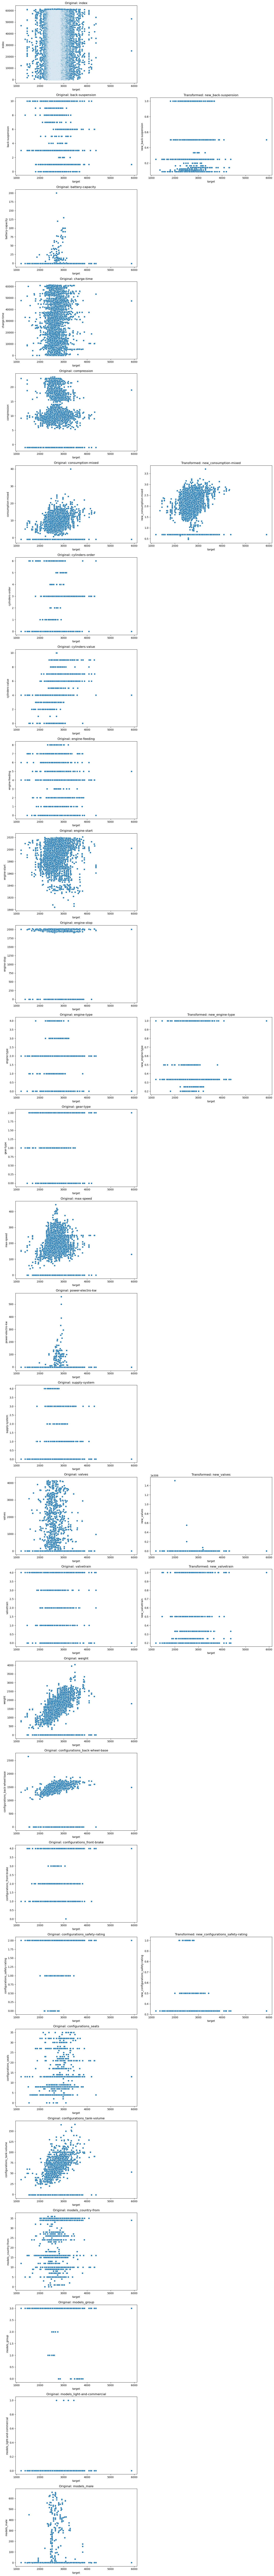

In [11]:
# визиализируем старые и новые признаки
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(15, 5 * len(features)))
for i, col in enumerate(features):
    sns.scatterplot(x=df['target'], y=df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'Original: {col}')
    
    if f'new_{col}' in res:
        sns.scatterplot(x=df['target'], y=df[f'new_{col}'], ax=axes[i, 1])
        axes[i, 1].set_title(f'Transformed: new_{col}')
    else:
        axes[i, 1].axis('off')  # cкроем, если преобразование не применялось

plt.tight_layout()
plt.show()

In [12]:
# смотрим насколько улучшилась корреляция 
df[res+['target']].corr(method='spearman')['target'].values - df[features+['target']].corr(method='spearman')['target'].values

array([0.00000000e+00, 3.64508046e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.23878682e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.06902175e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.61876838e-02, 9.21819971e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.19061228e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [13]:
# создаем датафрейм с корреляцией для "target"
corr_features = df.corr(method='spearman')['target'].reset_index()

In [14]:
high_corr_features = corr_features[np.abs(corr_features['target']) >= 0.3] 
high_corr_features

,index,target
6,cylinders-order,0.349834
7,cylinders-value,0.492853
18,weight,0.537532
19,configurations_back-wheel-base,0.590767
22,configurations_seats,0.306062
23,configurations_tank-volume,0.599780
28,target,1.000000


In [15]:
# список признаков минимум с умеренной теснотой связи
high_corr_features_list = high_corr_features['index'].to_list()[:-1]

In [16]:
# определимся с переменными
x = df[high_corr_features_list]
y = df['target']

In [17]:
# создадим полиномиальные признаки степени 5 
poly = PolynomialFeatures(degree=5, include_bias=False)
x_poly = poly.fit_transform(x)

# преобразуем в датафрейм
x_poly = pd.DataFrame(x_poly, columns=poly.get_feature_names_out(high_corr_features_list))
x_poly.head()

,cylinders-order,cylinders-value,weight,configurations_back-wheel-base,configurations_seats,configurations_tank-volume,cylinders-order^2,cylinders-order cylinders-value,cylinders-order weight,cylinders-order configurations_back-wheel-base,cylinders-order configurations_seats,cylinders-order configurations_tank-volume,cylinders-value^2,cylinders-value weight,cylinders-value configurations_back-wheel-base,cylinders-value configurations_seats,cylinders-value configurations_tank-volume,weight^2,weight configurations_back-wheel-base,weight configurations_seats,weight configurations_tank-volume,configurations_back-wheel-base^2,configurations_back-wheel-base configurations_seats,configurations_back-wheel-base configurations_tank-volume,configurations_seats^2,configurations_seats configurations_tank-volume,configurations_tank-volume^2,cylinders-order^3,cylinders-order^2 cylinders-value,cylinders-order^2 weight,cylinders-order^2 configurations_back-wheel-base,cylinders-order^2 configurations_seats,cylinders-order^2 configurations_tank-volume,cylinders-order cylinders-value^2,cylinders-order cylinders-value weight,cylinders-order cylinders-value configurations_back-wheel-base,cylinders-order cylinders-value configurations_seats,cylinders-order cylinders-value configurations_tank-volume,cylinders-order weight^2,cylinders-order weight configurations_back-wheel-base,cylinders-order weight configurations_seats,cylinders-order weight configurations_tank-volume,cylinders-order configurations_back-wheel-base^2,cylinders-order configurations_back-wheel-base configurations_seats,cylinders-order configurations_back-wheel-base configurations_tank-volume,cylinders-order configurations_seats^2,cylinders-order configurations_seats configurations_tank-volume,cylinders-order configurations_tank-volume^2,cylinders-value^3,cylinders-value^2 weight,cylinders-value^2 configurations_back-wheel-base,cylinders-value^2 configurations_seats,cylinders-value^2 configurations_tank-volume,cylinders-value weight^2,cylinders-value weight configurations_back-wheel-base,cylinders-value weight configurations_seats,cylinders-value weight configurations_tank-volume,cylinders-value configurations_back-wheel-base^2,cylinders-value configurations_back-wheel-base configurations_seats,cylinders-value configurations_back-wheel-base configurations_tank-volume,cylinders-value configurations_seats^2,cylinders-value configurations_seats configurations_tank-volume,cylinders-value configurations_tank-volume^2,weight^3,weight^2 configurations_back-wheel-base,weight^2 configurations_seats,weight^2 configurations_tank-volume,weight configurations_back-wheel-base^2,weight configurations_back-wheel-base configurations_seats,weight configurations_back-wheel-base configurations_tank-volume,weight configurations_seats^2,weight configurations_seats configurations_tank-volume,weight configurations_tank-volume^2,configurations_back-wheel-base^3,configurations_back-wheel-base^2 configurations_seats,configurations_back-wheel-base^2 configurations_tank-volume,configurations_back-wheel-base configurations_seats^2,configurations_back-wheel-base configurations_seats configurations_tank-volume,configurations_back-wheel-base configurations_tank-volume^2,configurations_seats^3,configurations_seats^2 configurations_tank-volume,configurations_seats configurations_tank-volume^2,configurations_tank-volume^3,cylinders-order^4,cylinders-order^3 cylinders-value,cylinders-order^3 weight,cylinders-order^3 configurations_back-wheel-base,cylinders-order^3 configurations_seats,cylinders-order^3 configurations_tank-volume,cylinders-order^2 cylinders-value^2,cylinders-order^2 cylinders-value weight,cylinders-order^2 cylinders-value configurations_back-wheel-base,cylinders-order^2 cylinders-value configurations_seats,cylinders-order^2 cylinders-value configurations_tank-volume,cylinders-order^2 weight^2,cylinders-order^2 weight configurations_back-wheel-base,cylinders-order^2 weight configurations_seats,cylinders-orde

In [18]:
# добавим столбец "target"
x_poly['target'] = y
x_poly.head()

,cylinders-order,cylinders-value,weight,configurations_back-wheel-base,configurations_seats,configurations_tank-volume,cylinders-order^2,cylinders-order cylinders-value,cylinders-order weight,cylinders-order configurations_back-wheel-base,cylinders-order configurations_seats,cylinders-order configurations_tank-volume,cylinders-value^2,cylinders-value weight,cylinders-value configurations_back-wheel-base,cylinders-value configurations_seats,cylinders-value configurations_tank-volume,weight^2,weight configurations_back-wheel-base,weight configurations_seats,weight configurations_tank-volume,configurations_back-wheel-base^2,configurations_back-wheel-base configurations_seats,configurations_back-wheel-base configurations_tank-volume,configurations_seats^2,configurations_seats configurations_tank-volume,configurations_tank-volume^2,cylinders-order^3,cylinders-order^2 cylinders-value,cylinders-order^2 weight,cylinders-order^2 configurations_back-wheel-base,cylinders-order^2 configurations_seats,cylinders-order^2 configurations_tank-volume,cylinders-order cylinders-value^2,cylinders-order cylinders-value weight,cylinders-order cylinders-value configurations_back-wheel-base,cylinders-order cylinders-value configurations_seats,cylinders-order cylinders-value configurations_tank-volume,cylinders-order weight^2,cylinders-order weight configurations_back-wheel-base,cylinders-order weight configurations_seats,cylinders-order weight configurations_tank-volume,cylinders-order configurations_back-wheel-base^2,cylinders-order configurations_back-wheel-base configurations_seats,cylinders-order configurations_back-wheel-base configurations_tank-volume,cylinders-order configurations_seats^2,cylinders-order configurations_seats configurations_tank-volume,cylinders-order configurations_tank-volume^2,cylinders-value^3,cylinders-value^2 weight,cylinders-value^2 configurations_back-wheel-base,cylinders-value^2 configurations_seats,cylinders-value^2 configurations_tank-volume,cylinders-value weight^2,cylinders-value weight configurations_back-wheel-base,cylinders-value weight configurations_seats,cylinders-value weight configurations_tank-volume,cylinders-value configurations_back-wheel-base^2,cylinders-value configurations_back-wheel-base configurations_seats,cylinders-value configurations_back-wheel-base configurations_tank-volume,cylinders-value configurations_seats^2,cylinders-value configurations_seats configurations_tank-volume,cylinders-value configurations_tank-volume^2,weight^3,weight^2 configurations_back-wheel-base,weight^2 configurations_seats,weight^2 configurations_tank-volume,weight configurations_back-wheel-base^2,weight configurations_back-wheel-base configurations_seats,weight configurations_back-wheel-base configurations_tank-volume,weight configurations_seats^2,weight configurations_seats configurations_tank-volume,weight configurations_tank-volume^2,configurations_back-wheel-base^3,configurations_back-wheel-base^2 configurations_seats,configurations_back-wheel-base^2 configurations_tank-volume,configurations_back-wheel-base configurations_seats^2,configurations_back-wheel-base configurations_seats configurations_tank-volume,configurations_back-wheel-base configurations_tank-volume^2,configurations_seats^3,configurations_seats^2 configurations_tank-volume,configurations_seats configurations_tank-volume^2,configurations_tank-volume^3,cylinders-order^4,cylinders-order^3 cylinders-value,cylinders-order^3 weight,cylinders-order^3 configurations_back-wheel-base,cylinders-order^3 configurations_seats,cylinders-order^3 configurations_tank-volume,cylinders-order^2 cylinders-value^2,cylinders-order^2 cylinders-value weight,cylinders-order^2 cylinders-value configurations_back-wheel-base,cylinders-order^2 cylinders-value configurations_seats,cylinders-order^2 cylinders-value configurations_tank-volume,cylinders-order^2 weight^2,cylinders-order^2 weight configurations_back-wheel-base,cylinders-order^2 weight configurations_seats,cylinders-orde

In [19]:
# датафрейм с корреляцией конкретно для "target"
corr_features = x_poly.corr(method='spearman')['target'].reset_index()

In [20]:
# связь должна быть хотя бы умеренной
high_corr_features = corr_features[np.abs(corr_features['target']) >= 0.3]
high_corr_features

,index,target
0,cylinders-order,0.349834
1,cylinders-value,0.492853
2,weight,0.537532
3,configurations_back-wheel-base,0.590767
4,configurations_seats,0.306062
...,...,...
457,configurations_seats^3 configurations_tank-vol...,0.527678
458,configurations_seats^2 configurations_tank-vol...,0.571973
459,configurations_seats configurations_tank-volume^4,0.615222
460,configurations_tank-volume^5,0.599780


In [21]:
# создаем список полиномиальных признаков минимум с умеренной теснотой связи
high_corr_features_list = high_corr_features['index'].to_list()[:-1]

# определяемся с переменными
x = x_poly[high_corr_features_list]
y =  x_poly['target']

# разделяем на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
# стандартизация
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

In [ ]:
# модель линейной регрессии
model = LinearRegression()
model.fit(x_train_st, y_train)

LinearRegression()

In [25]:
# стандартизация
x_test_st = scaler.transform(x_test)

In [26]:
# делаем прогноз
y_pred = model.predict(x_test_st)

In [27]:
# посчитаем mse
mean_squared_error(y_test, y_pred)

17009.83983786347

Таким образом, наилучший результат 17 010

In [28]:
# r2
r2_score(y_test, y_pred)

0.6965794555685196